<a href="https://colab.research.google.com/github/imjdl03/implementacion-TC3006C-A00829759/blob/main/regresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jorge Eduardo de León Reyna - A00829759

# Sesión 03: Ejercicio regresión logística (clasificación)
Implemente un clasificador que estime si un estudiante aprueba o no el curso:
* Considerando solamente la columna ‘Attendance’
* Considerando solamente la columna ‘Homework’

Calcule las métricas de desempeño y compare los clasificadores. ¿Cuál es mejor?

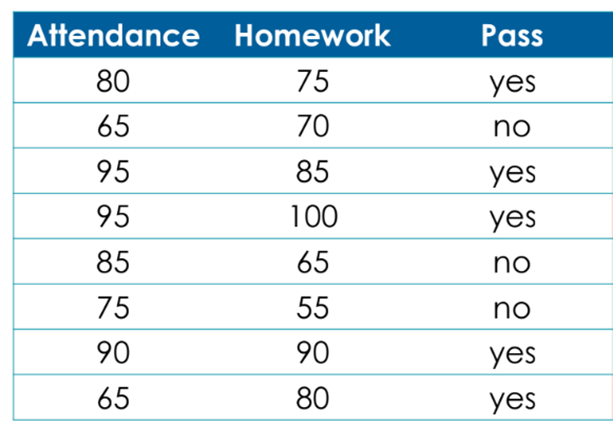

## Antes de empezar
Lo primero que debemos hacer es cargar los datos (listas) y los valores iniciales de los hiper-parámetros. Para ello, debemos:

In [54]:
# Crear lista con los valores de la variable independiente (Attendance)
attendance = [80, 65, 95, 95, 85, 75, 90, 65]
# Crear lista con los valores de la variable independiente (Homework)
homework = [75, 70, 85, 100, 65, 55, 90, 80]
# Crear lista con los valores de la variable dependiente (Pass: no = 0, yes = 1)
y = [1, 0, 1, 1, 0, 0, 1, 1]
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [0.05, 0.01]
# Cargar el valor del learning rate (alpha)
alpha = 0.01

También ocupamos una alternativa que nos permita estimar fácilmente la variable dependiente y el total de muestras. Dado que implementaremos la función logística, ocupamos la función exponencial, por lo que requerimos el módulo **math**:

In [55]:
# Importar módulo math
import math
import pandas as pd

# Crear función lambda para la función de hipótesis
#h = lambda x, theta: 1 / (1 + math.e ** (-1 * (theta[0] + (theta[1] * x))))
h = lambda x, theta: 1 / (1 + math.exp(-1 * (theta[0] + theta[1] * x)))


# Calcular el total de muestras a partir de los datos (n)
n = 8

También ocupamos una variable para el total de iteraciones, con el fin de garantizar que ambos métodos se entrenen bajo las mismas condiciones:

In [56]:
# Definir total de iteraciones a ejecutar
iteraciones = 10000000

## Iteraciones
En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, debemos actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [57]:
# Seleccionar la muestra a utilizar (Attendance o Homework)
x = attendance

#reiniciamos valores de theta
theta_attendance = [1,1]
alpha = 0.01

# Implementar ciclo para iteraciones
for i in range(0, iteraciones):
  # Crear acumuladores
  delta1_aux = 0
  delta2_aux = 0

  # Barrer muestras
  # Calcular delta para theta0 y para cada muestra
  for j in range(0, n):
    current_cost_function_value = h(x[j], theta_attendance)

    # Calcular delta para theta1 y para cada muestra
    delta1_aux += current_cost_function_value - y[j]

    # Calcular delta para theta2 y para cada muestra
    delta2_aux += (current_cost_function_value - y[j]) * x[j]

  # Calcular sumatorias y promedio
  # Actualizar theta0
  theta_attendance[0] -= (alpha * (delta1_aux / n))
  # Actualizar theta1
  theta_attendance[1] -= (alpha * (delta2_aux / n))

# Imprimir theta actualizado
print("theta final 1 => ", theta_attendance[0])
print("theta final 2 => ", theta_attendance[1])
# Preservar hiper-parámetros del modelo

theta final 1 =>  -41.89815032478635
theta final 2 =>  0.44431167642054176


## Modelo 2
Ahora debemos repetir el proceso, pero entrenando con base en la otra entrada:

In [58]:
# Seleccionar la muestra a utilizar (Attendance o Homework)
x = homework

#reiniciamos valores de theta
theta_homework = [1,1]
alpha = 0.01

# Implementar ciclo para iteraciones
for i in range(0, iteraciones):
  # Crear acumuladores
  delta1_aux = 0
  delta2_aux = 0

  # Barrer muestras
  # Calcular delta para theta0 y para cada muestra
  for j in range(0, n):
    current_cost_function_value = h(x[j], theta_homework)

    # Calcular delta para theta1 y para cada muestra
    delta1_aux += current_cost_function_value - y[j]

    # Calcular delta para theta2 y para cada muestra
    delta2_aux += (current_cost_function_value - y[j]) * x[j]

  # Calcular sumatorias y promedio
  # Actualizar theta0
  theta_homework[0] -= (alpha * (delta1_aux / n))
  # Actualizar theta1
  theta_homework[1] -= (alpha * (delta2_aux / n))

# Imprimir theta actualizado
print("theta final 1 => ", theta_homework[0])
print("theta final 2 => ", theta_homework[1])


# Preservar hiper-parámetros del modelo

theta final 1 =>  -101.49688608180031
theta final 2 =>  1.4004480356493165


## Evaluación
Antes de poder evaluar nuestro modelo, necesitamos agrupar las predicciones de cada uno, para poder compararlas:

In [62]:
# Inicializar acumuladores
predictions_homework = []
predictions_attendance = []

# Barrer la entrada y estimar las salidas:
for i in range(n):
  predictions_homework.append(round(h(homework[i], theta_homework)))
  predictions_attendance.append(round(h(attendance[i], theta_attendance)))

homework_results = {'Predictions': predictions_homework, 'Real Value': y}
df_homework = pd.DataFrame(homework_results)

attendance_results = {'Predictions': predictions_attendance, 'Real Value': y}
df_attendance = pd.DataFrame(homework_results)

print("Homework Results")
print(df_homework)

print("Attendance Results")
print(df_attendance)

Homework Results
   Predictions  Real Value
0            1           1
1            0           0
2            1           1
3            1           1
4            0           0
5            0           0
6            1           1
7            1           1
Attendance Results
   Predictions  Real Value
0            1           1
1            0           0
2            1           1
3            1           1
4            0           0
5            0           0
6            1           1
7            1           1


Para estimar qué tan bueno es cada clasificador, debemos generar las matrices de confusión y las correspondientes métricas:

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

$precision = \frac{VP}{VP+FP}$

$recall = \frac{VP}{VP+FN}$

$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$

In [63]:
# Inicializar contadores para VP, FP, VN, FN (modelo 1)
# Barrer datos reales y predicciones (modelo 1)
VP_homework = 0
FP_homework = 0
VN_homework = 0
FN_homework = 0

VP_attendance = 0
FP_attendance = 0
VN_attendance = 0
FN_attendance = 0

# Barrer datos reales y predicciones (modelo 1)
for i in range(len(df_homework)):
    value = df_homework.at[i, 'Real Value']
    prediction = df_homework.at[i, 'Predictions']

    # Analizar opciones para dato real == 1
    if value == 1:
      # Analizar si predicción == 1 (VP) o == 0 (FN)
      if prediction == 1:
        VP_homework += 1
      else:
        FN_homework += 1

    # Analizar opciones para dato real == 0
    if value == 0:
      # Analizar si predicción == 1 (FP) o == 0 (VN)
      if prediction == 1:
        FP_homework += 1
      else:
        VN_homework += 1


for i in range(len(df_homework)):
    value = df_homework.at[i, 'Real Value']
    prediction = df_homework.at[i, 'Predictions']

    # Analizar opciones para dato real == 1
    if value == 1:
      # Analizar si predicción == 1 (VP) o == 0 (FN)
      if prediction == 1:
        VP_attendance += 1
      else:
        FN_attendance += 1

    # Analizar opciones para dato real == 0
    if value == 0:
      # Analizar si predicción == 1 (FP) o == 0 (VN)
      if prediction == 1:
        FP_attendance += 1
      else:
        VN_attendance += 1


print("VP_homework = ", VP_homework)
print("FP_homework = ", FP_homework)
print("VN_homework = ", VN_homework)
print("FN_homework = ", FN_homework)

print("VP_attendance = ", VP_attendance)
print("FP_attendance = ", FP_attendance)
print("VN_attendance = ", VN_attendance)
print("FN_attendance = ", FN_attendance)

  # Analizar opciones para dato real == 1
    # Analizar si predicción == 1 (VP) o == 0 (FN)
  # Analizar opciones para dato real == 0
    # Analizar si predicción == 1 (FP) o == 0 (VN)

# Repetir para modelo 2
# Barrer datos reales y predicciones (modelo 2)
  # Analizar opciones para dato real == 1
    # Analizar si predicción == 1 (VP) o == 0 (FN)
  # Analizar opciones para dato real == 0
    # Analizar si predicción == 1 (FP) o == 0 (VN)

# Imprimir totales

VP_homework =  5
FP_homework =  0
VN_homework =  3
FN_homework =  0
VP_attendance =  5
FP_attendance =  0
VN_attendance =  3
FN_attendance =  0


Para estimar qué tan bueno es cada clasificador, debemos generar las matrices de confusión y las correspondientes métricas:

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

$precision = \frac{VP}{VP+FP}$

$recall = \frac{VP}{VP+FN}$

$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$

In [64]:
# Calcular métricas para modelo 1
acccuracy_homework = (VP_homework + VN_homework) / (VP_homework + VN_homework + FP_homework + FN_homework)
precision_homework = (VP_homework) / (VP_homework + FP_homework)
recall_homework = (VP_homework) / (VP_homework + FN_homework)
f1_homework = (2 * precision_homework * recall_homework) / (precision_homework + recall_homework)

print("Accuracy homework = ", acccuracy_homework)
print("Precision homework = ", precision_homework)
print("Recall homework = ", recall_homework)
print("F1 homework = ", f1_homework)

# Calcular métricas para modelo 2
acccuracy_attendance = (VP_attendance + VN_attendance) / (VP_attendance + VN_attendance + FP_attendance + FN_attendance)
precision_attendance = (VP_attendance) / (VP_attendance + FP_attendance)
recall_attendance = (VP_attendance) / (VP_attendance + FN_homework)
f1_attendance = (2 * precision_attendance * recall_attendance) / (precision_attendance + recall_attendance)

print("Accuracy attendance = ", acccuracy_attendance)
print("Precision attendance = ", precision_attendance)
print("Recall homattendanceework = ", recall_attendance)
print("F1 attendance = ", f1_attendance)

Accuracy homework =  1.0
Precision homework =  1.0
Recall homework =  1.0
F1 homework =  1.0
Accuracy attendance =  1.0
Precision attendance =  1.0
Recall homattendanceework =  1.0
F1 attendance =  1.0
